# Linear regression example

Here we do the following:

1. Generate synthetic X/y data
2. Solve for optimal $\theta$
3. Plot the results

Text(0.5, 1.0, 'Synthetic data for testing linear regression')

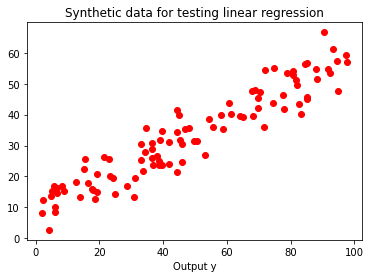

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data

# Suppose the "true" theta = [ 10, 0.5 ]

theta_true = np.array([[10], [0.5]])

# Generate 100 points x between 0 and 100

X = np.random.uniform(0, 100, 100).reshape((100, 1))
X = np.concatenate((np.ones((100, 1)), X), 1)

# Generate the "noisy" values of y for each X

y = X @ theta_true + np.random.normal(0, 5, (100, 1))

# Plot them

plt.plot(X[:,1], y, 'ro')
plt.xlabel('Input x')
plt.xlabel('Output y')
plt.title('Synthetic data for testing linear regression')

Epoch 0: cost 1321.835412 grad[-3315.948737 , -199339.144378]
Epoch 10: cost 46.466183 grad[-306.501109 , -4769.456338]
Epoch 20: cost 45.724175 grad[-234.385078 , -110.687983]
Epoch 30: cost 45.712934 grad[-232.600418 , 0.860495]
Epoch 40: cost 45.702117 grad[-232.499785 , 3.530512]
Epoch 50: cost 45.691306 grad[-232.439490 , 3.593547]
Epoch 60: cost 45.680500 grad[-232.380174 , 3.594161]
Epoch 70: cost 45.669700 grad[-232.320897 , 3.593281]
Epoch 80: cost 45.658906 grad[-232.261636 , 3.592365]
Epoch 90: cost 45.648117 grad[-232.202389 , 3.591449]


Text(0.5, 1.0, 'Cost over time')

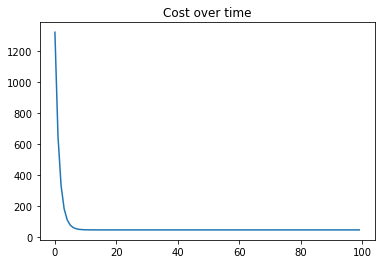

In [2]:
# Implement linear regression

theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y

# Gradient descent

def gradient (X,y,theta):
    m = X.shape[0]
    n = theta.shape[0]
    yhat = X@ theta
    J = ((yhat - y)*(yhat - y)).sum()/m
    # Gradient : sum (yhat - y) * x^i
    grad_J = np.zeros((n,1))
    for i in range(m):
        grad_J = grad_J + (yhat[i,0] - y[i,0]) * X[i:i+1,0:].T
    return J, grad_J

alpha = 0.000001
theta = np.array([[0],[0]])
costs = []
for iter in range(100):
    cost, grad = gradient(X,y, theta)
    costs.append(cost)
    if iter%10 == 0:
        print('Epoch %d: cost %f grad[%f , %f]' % (iter, cost, grad[0],grad[1]))
    theta = theta - alpha * grad

plt.plot (costs)
plt.title('Cost over time')

Epoch 0: cost 1321.835412
Epoch 1: cost 46.359798 grad[-2.810174 , -163.067880]
Epoch 2: cost 47.702013 grad[-15.701483 , -243.338726]
Epoch 3: cost 47.277919 grad[7.829399 , 241.104519]
Epoch 4: cost 46.812208 grad[14.413080 , 1404.264677]
Epoch 5: cost 47.610116 grad[2.807339 , 226.499105]
Epoch 6: cost 46.980195 grad[0.941104 , 31.753580]
Epoch 7: cost 50.257389 grad[-1.555512 , -52.484194]
Epoch 8: cost 47.036550 grad[-3.078697 , -167.463740]
Epoch 9: cost 65.254312 grad[-9.521657 , -219.481095]
Epoch 10: cost 60.571771 grad[-13.344668 , -1205.838192]
Epoch 11: cost 44.609238 grad[-4.506012 , -61.834265]
Epoch 12: cost 45.135601 grad[-5.394314 , -313.019574]
Epoch 13: cost 48.352996 grad[-3.445115 , -66.035489]
Epoch 14: cost 45.231976 grad[-3.558758 , -300.490114]
Epoch 15: cost 56.637022 grad[-9.993639 , -89.840747]
Epoch 16: cost 54.636327 grad[5.644413 , 300.552330]
Epoch 17: cost 58.992076 grad[-2.760844 , -101.646320]
Epoch 18: cost 47.570492 grad[9.034997 , 798.979375]
Epoch

Text(0.5, 1.0, 'Cost over time')

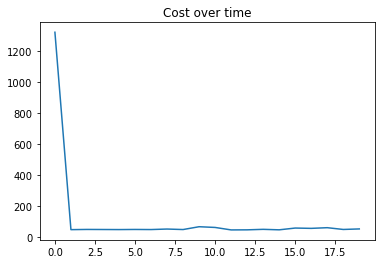

In [4]:
# Stochastic gradient descent
m = X.shape[0]
alpha = 0.0001
theta = np.array([[0],[0]])
cost, _ = gradient(X,y, theta)
print('Epoch 0: cost %f' % (cost))
costs = [cost]

for epoch in range(1,20):
    order = np.arange(m)
    np.random.shuffle(order)
    for iter in range(m):
        i = order[iter]
        _, grad = gradient(X[i:i+1,:], y[i:i+1], theta)
        theta = theta - alpha * grad
    cost, _ = gradient(X,y, theta)
    costs.append(cost)
    print('Epoch %d: cost %f grad[%f , %f]' % (epoch, cost, grad[0],grad[1]))
    
plt.plot (costs)
plt.title('Cost over time')